<a href="https://colab.research.google.com/github/dayogh/portfolio/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier as rfc
from xgboost import XGBClassifier as xgb
from sklearn.ensemble import AdaBoostClassifier as adbc
from sklearn.model_selection import train_test_split as tts


import warnings
warnings.filterwarnings("ignore")

# Mount Data

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


tilda ~ creates a temporary directory


In [ ]:
! mkdir ~/.kaggle

escape slash \ to handle space in directory path

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/Github/Kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json


read/write permission for user only

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Download the data from Kaggle

In [ ]:
! kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 39.7MB/s]


In [ ]:
! unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Importing the Data

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

Inspecting the dataset



In [ ]:
print('--'*25)
print('The shape of the training data is : {}'.format(train_data.shape))
print('--'*25)
print('The shape of the test data is     : {}'.format(test_data.shape))
print('--'*25)

--------------------------------------------------
The shape of the training data is : (891, 12)
--------------------------------------------------
The shape of the test data is     : (418, 11)
--------------------------------------------------


There are 12 columns in the training dataset and 11 columns in the test dataset. In the test dataset, there is no column for the surviving class; we need to predict this and submit it.

# Data Exploration

Train data

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test data

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Missing Values and Data types

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Descriptive Statistics of the Dataset

Train Data

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Test Data


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Number of Unique Values per Column

Train Data

In [ ]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Test Data

In [ ]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

# Filling Missing Values

Addressing Missing Values


Train Data

Fill the Missing "Embarked" Value with "S"

In [ ]:
train_data['Embarked'].fillna(value='S', inplace=True)

In this cell, The first part of the names were observed and the corresponding average age was calculated for each of first name type.

In [ ]:
mean_age_miss = train_data[train_data["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = train_data[train_data["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = train_data[train_data["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = train_data[train_data["Name"].str.contains('Master.', na=False)]['Age'].mean().round()


Defining a function which inspects the first name of a person and assigns missing age value with the calculated average age according to first name type. After that, the function is applied to the dataframe.



In [ ]:
def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age
    
train_data['Age'] = train_data[['Name', 'Age']].apply(fill_age,axis=1)


Defining a function which reassigns the cabin according to the fare. After that, it is applied to the dataframe to fill all the cabin column's missing value.



In [ ]:
def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'D'
        else:
            return 'X'
    else:
        return cabin
train_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in train_data['Cabin']])
train_data['Cabin'] = train_data[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)
train_data['Cabin'] = train_data.Cabin.astype("category").cat.codes


After that preprocessing, it is seen that there are no missing values in the training dataset.



In [ ]:
print(train_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int8   
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


Test Data

Perform the same preprocessign tasks with the test dataset.



In [ ]:
test_data['Fare'].fillna(value=test_data.Fare.mean(), inplace=True)
test_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in test_data['Cabin']])
test_data['Cabin'] = test_data[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)
test_data['Age'] = test_data[['Name', 'Age']].apply(fill_age,axis=1)
dfps=test_data.PassengerId
test_data=test_data.drop(['PassengerId','Ticket'],axis=1)
test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes


After that preprocessing, it is seen that there are no missing values in the test dataset as well.



In [ ]:
print(test_data.isnull().sum())


Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [ ]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Cabin     418 non-null    int8   
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), int8(1), object(3)
memory usage: 26.7+ KB


#  Data Visualization and EDA

Survived VS Dead

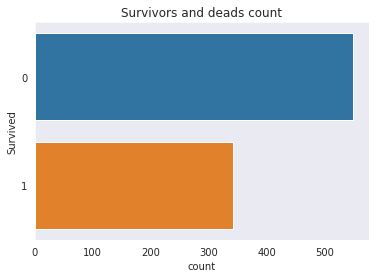

In [ ]:
g = sns.countplot(y=train_data['Survived']).set_title('Survivors and deads count')


Survival Rate and Passenger Count with Respect to Sex¶


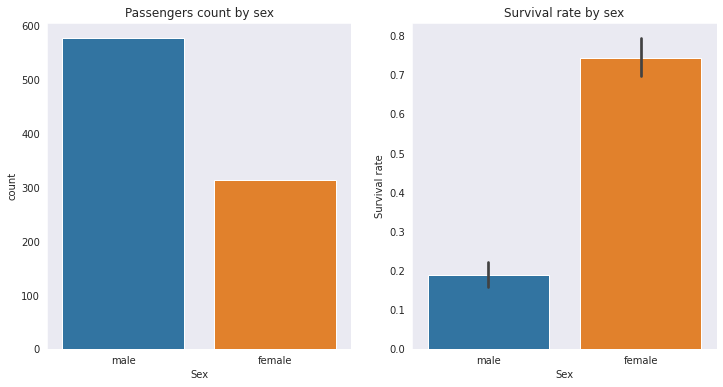

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(train_data['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

Survival Rate and Passenger Count with Respect to Passenger Class

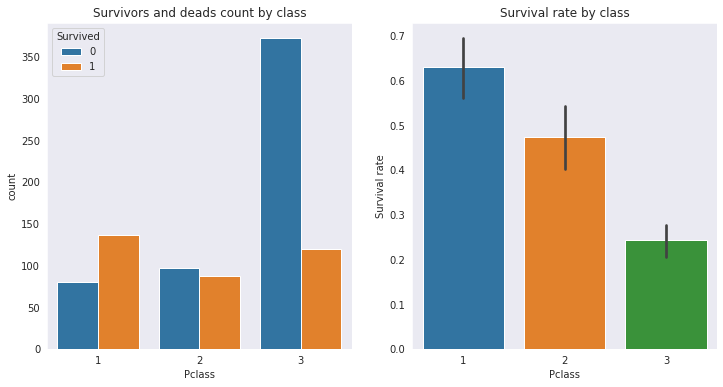

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train_data, ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')


Survival Rate with Respect to Passenger Class for male and Female

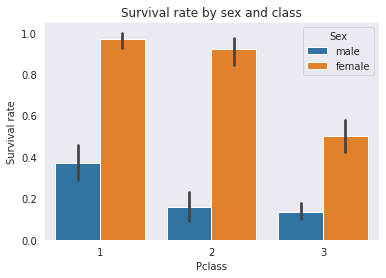

In [ ]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data).set_ylabel('Survival rate')


Age Distribution of the Dataset and Age Distribution for Both Dead and Survived

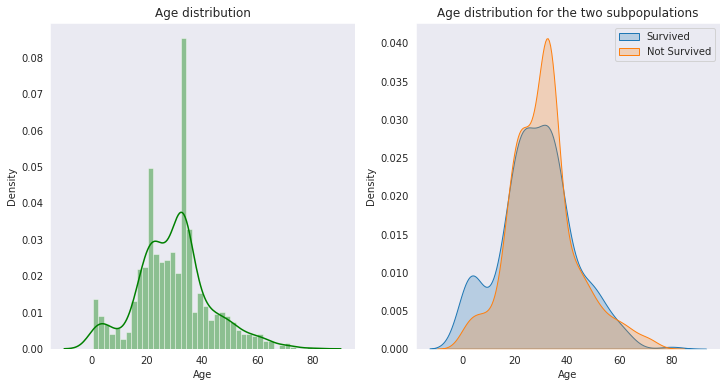

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')
f = sns.distplot(train_data['Age'], color='g', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')
plt.legend()


Fare Distribution and Survival Rate with respect to Fare Category

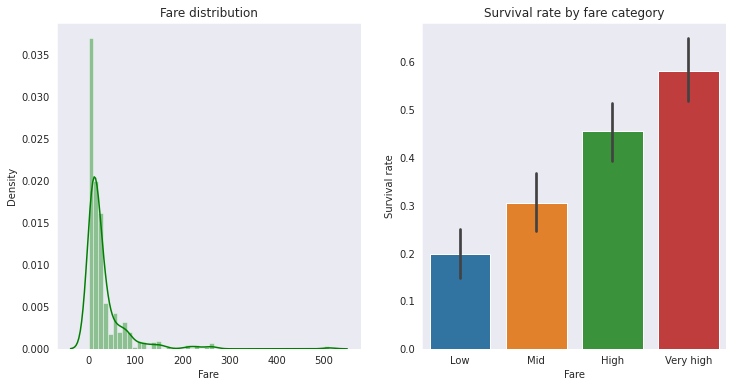

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_data.Fare, color='g', ax=axarr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_data.Survived, ax=axarr[1]).set_ylabel('Survival rate')


Embarked Class Distribution and Survival Rate with restpect to Embarked Class

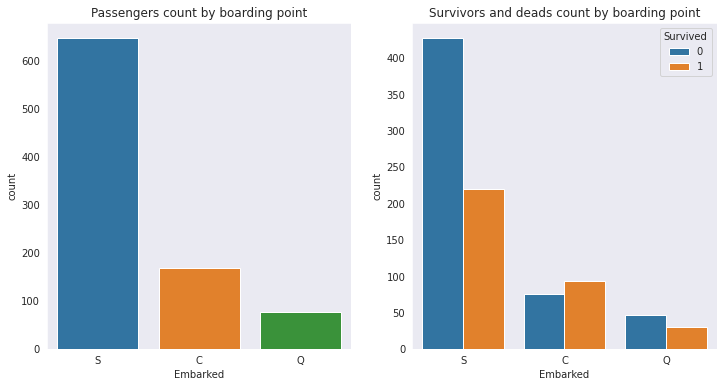

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')


SibSp Class Distribution and Survival Rate with respect to SibSp Class

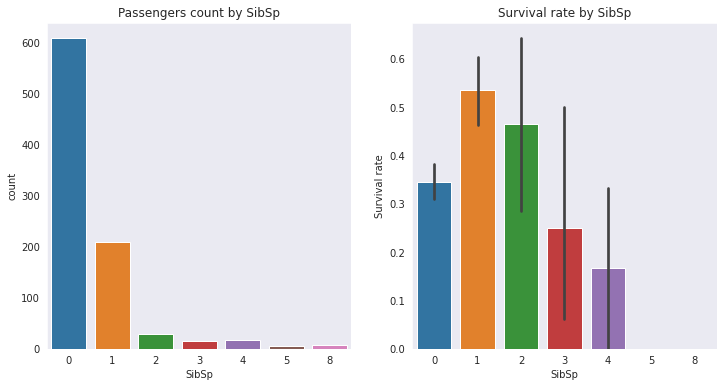

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['SibSp'], ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')


Parch Class Distribution and Survival Rate with restpect to Parch Class

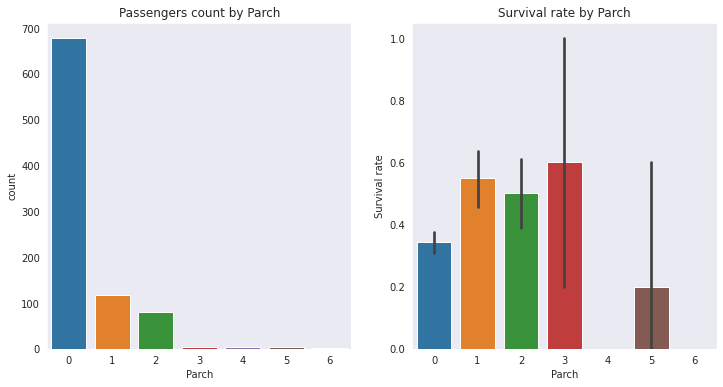

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

# Feature Extraction

Encoding Male and Female

In [ ]:
sex={'male':0,'female':1}
train_data=train_data.replace({'Sex':sex})
test_data =test_data.replace({'Sex':sex})

Encoding the Embarks

In [ ]:
embark={'S':1,'Q':2,'C':3}
train_data=train_data.replace({'Embarked':embark})
test_data =test_data.replace({'Embarked':embark})

Dropping Some Columns

In [ ]:
train_data = train_data.drop(['PassengerId','Ticket','Parch','Embarked','Name'], axis=1)
test_data  = test_data.drop(['Parch','Embarked','Name'], axis=1)

Separating Label and Features 

In [ ]:
features_train=train_data.iloc[:,1:7]
labels_train  = train_data.iloc[:,0]

# Train Test Split

In [ ]:
x_tr,x_te,y_tr,y_te=tts(features_train,labels_train,test_size=0.3,random_state=1)

# Apply Different ML Methods

Initialize the Models

In [ ]:
svc = SVC(kernel='rbf', random_state = 1)
rfc = rfc()
knc = KNeighborsClassifier()
xgb = xgb()
adb = adbc(n_estimators=100, random_state=1)


Fit and Test The Models

In [ ]:
svc.fit(x_tr,y_tr)
rfc.fit(x_tr,y_tr)
knc.fit(x_tr,y_tr)
xgb.fit(x_tr,y_tr)
adb.fit(x_tr,y_tr)

y_pr_svc= svc.predict(x_te)
y_pr_rfc= rfc.predict(x_te)
y_pr_knc= knc.predict(x_te)
y_pr_xgb= xgb.predict(x_te)
y_pr_adb= adb.predict(x_te)

pred_list = ['Support Vector Machine','Random Forest', 'KNN','XGBoost','Ada Boost']
pred_all  = [acc(y_pr_svc,y_te)*100,acc(y_pr_rfc,y_te)*100,acc(y_pr_knc,y_te)*100,acc(y_pr_xgb,y_te)*100,acc(y_pr_adb,y_te)*100]

for i in range(5):
  print('{} has {} percent accuracy'.format(pred_list[i],pred_all[i]))

Support Vector Machine has 64.92537313432835 percent accuracy
Random Forest has 78.73134328358209 percent accuracy
KNN has 68.65671641791045 percent accuracy
XGBoost has 78.73134328358209 percent accuracy
Ada Boost has 74.25373134328358 percent accuracy


Prediction of all models with test data

In [ ]:
y_prd_svc= svc.predict(test_data)
y_prd_rfc= rfc.predict(test_data)
y_prd_knc= knc.predict(test_data)
y_prd_xgb= xgb.predict(test_data)
y_prd_adb= adb.predict(test_data)


# Output

In [ ]:
output = pd.DataFrame({'PassengerId': dfps, 'Survived': y_prd_rfc})
output.head()
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
